# 1. Linear Reagression
### 공부 시간에 따른 시험 점수

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [3]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [4]:
x = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직전까지의 데이터 (독립변수)
y = dataset.iloc[:, -1].values # 마지칵 컬럼 데이터 (종속 변수 - 결과)

In [5]:
x, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(x, y) # 학습 (모델 생성)

LinearRegression()

In [8]:
y_pred = reg.predict(x) # x에 대한 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

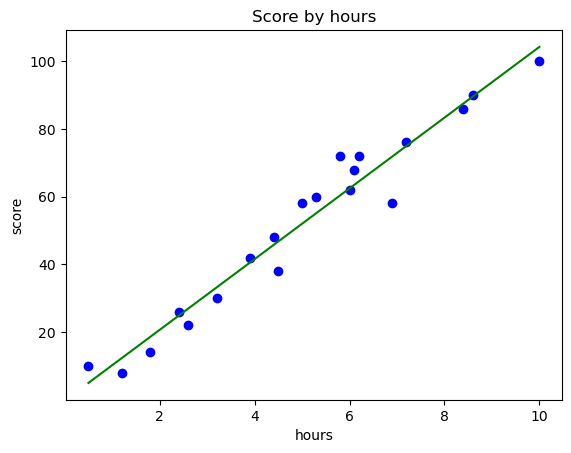

In [9]:
plt.scatter(x, y, color='blue') # 산점도
plt.plot(x, y_pred, color ='green') # 선 그래프
plt.title('Score by hours') # 제목
plt.xlabel('hours') # x축 이름
plt.ylabel('score') # y축 이름
plt.show()

In [12]:
print('9, 8, 7시간 공부했을 때 예상 점수 : ', reg.predict([[9], [8], [7]])) # 2차원 배열형태로 들어가야 한다.

9, 8, 7시간 공부했을 때 예상 점수 :  [93.77478776 83.33109082 72.88739388]


In [13]:
reg.coef_ # 기울기 (m)

array([10.44369694])

In [14]:
reg.intercept_ # y 절편 (b)

-0.21848470286721522

y= mx + b -> y = 10.4436 - 0.2184

### 데이터 세트 분리

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [19]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 훈련 80 : 테스트 20 으로 분리

In [21]:
X, len(X) # 전체 데이터 X, 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [22]:
X_train, len(X_train) # 훈련 세트 X, 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [25]:
X_test, len(X_test) # 테스트 세트 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [26]:
y, len(y) # 전체 데이터 y

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [27]:
y_train, len(y_train) # 훈련 세트 y

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [28]:
y_test, len(y_test) # 테스트 세트 y

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 모델링

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [30]:
reg.fit(X_train, y_train) # 훈련 세트로 학습

LinearRegression()

### 데이터 시각화 (훈련 세트)

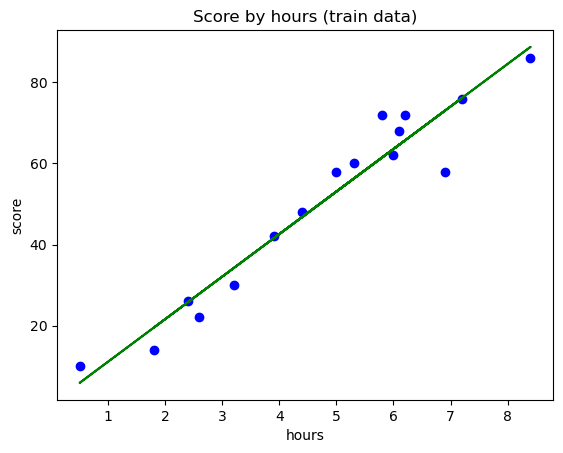

In [34]:
plt.scatter(X_train, y_train, color='blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color ='green') # 선 그래프
plt.title('Score by hours (train data)') # 제목
plt.xlabel('hours') # x축 이름
plt.ylabel('score') # y축 이름
plt.show()

### 데이터 시각화 (테스트 세트)

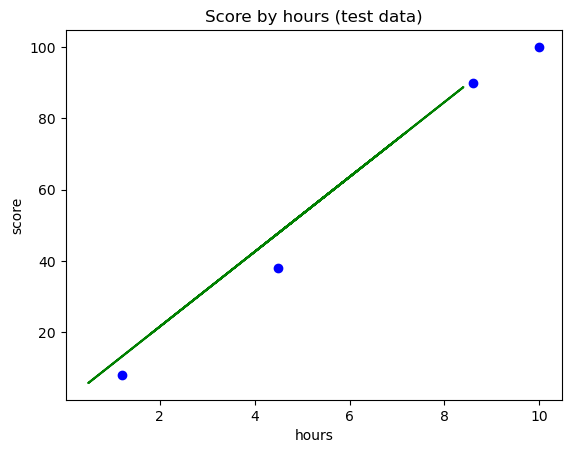

In [35]:
plt.scatter(X_test, y_test, color='blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color ='green') # 선 그래프
plt.title('Score by hours (test data)') # 제목
plt.xlabel('hours') # x축 이름
plt.ylabel('score') # y축 이름
plt.show()

In [36]:
reg.coef_

array([10.49161294])

In [37]:
reg.intercept_

0.6115562905169796

### 모델 평가

In [38]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [39]:
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9356663661221668